# 서울시 지하철 분석
## 데이터 시각화 기말프로젝트

201814471 서지희

사용할 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

import seaborn as sns

In [2]:
#한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 시간대별 지하철 이용 수

데이터 로딩

In [3]:
# 2020년 11월 데이터 사용
df = pd.read_csv('./data/2020_11.csv', thousands = ',')
display(df.head())

,사용월,호선명,역ID,지하철역,4:00,5:00,6:00,7:00,8:00,9:00,...,18:00,19:00,20:00,21:00,22:00,23:00,0:00,1:00,2:00,3:00
0,2020-11,1호선,1,서울역,753,8675,11072,32647,59127,41390,...,183615,94572,63184,61979,40086,13602,49,0,0,0
1,2020-11,1호선,10,동묘앞,123,3339,3256,5769,8088,6810,...,19668,8718,5118,4856,2979,1107,1,0,1,0
2,2020-11,1호선,2,시청,46,1906,2883,5827,7572,8301,...,129123,48632,38231,37627,21534,6610,22,0,0,0
3,2020-11,1호선,3,종각,122,2851,3442,5353,8357,10185,...,190651,82999,68519,74284,51200,18973,81,0,3,0
4,2020-11,1호선,4,종로3가,175,3652,3448,4655,7046,9708,...,94262,54470,39668,44288,32207,11090,51,2,1,1


In [4]:
# 테이블의 모든 정보를 보기 위해서 set_option()함수를 사용하였다.
pd.set_option('display.max_rows', 610)
pd.set_option('display.max_columns', 100)
display(df)

,사용월,호선명,역ID,지하철역,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00,1:00,2:00,3:00
0,2020-11,1호선,1,서울역,753,8675,11072,32647,59127,41390,38848,45649,56164,59894,50166,69417,73931,129234,183615,94572,63184,61979,40086,13602,49,0,0,0
1,2020-11,1호선,10,동묘앞,123,3339,3256,5769,8088,6810,7547,11792,17177,24148,28516,32662,31980,29852,19668,8718,5118,4856,2979,1107,1,0,1,0
2,2020-11,1호선,2,시청,46,1906,2883,5827,7572,8301,9008,13391,15406,19664,24861,33005,38620,69711,129123,48632,38231,37627,21534,6610,22,0,0,0
3,2020-11,1호선,3,종각,122,2851,3442,5353,8357,10185,13298,20795,27078,34326,40433,52948,61859,123235,190651,82999,68519,74284,51200,18973,81,0,3,0
4,2020-11,1호선,4,종로3가,175,3652,3448,4655,7046,9708,17330,26846,36216,44880,48904,56171,62258,71916,94262,54470,39668,44288,32207,11090,51,2,1,1
5,2020-11,1호선,5,종로5가,90,1602,2385,4260,6690,9608,14488,22488,28313,34237,41383,46779,52482,71600,94499,45564,28692,23037,15141,4689,28,0,0,0
6,2020-11,1호선,6,동대문,655,12826,8925,14146,18390,17102,15143,16320,20120,21206,23013,23687,24813,25646,22783,15058,12250,11159,8818,3971,31,0,0,0
7,2020-11,1호선,7,신설동,362,8355,7878,16191,23703,15582,13972,16562,17694,20334,20206,21665,28234,39341,56530,20875,13277,12447,7589,2682,19,0,1,1
8,2020-11,1호선,8,제기동,453,4777,7698,20120,29902,20383,21825,29747,36250,39653,43294,47061,43532,40090,35167,16292,10275,8765,6611,2292,11,1,3,0
9,2020-11,1호선,9,청량리(서울시립대입구),1292,9852,14384,36708,45119,30256,26164,31785,37041,38673,42062,45730,50854,48091,39076,21953,16767,11836,8050,2855,54,0,0,0


데이터 정보 확인

In [5]:
print('df.index = ', df.index)
print()
print('df.columns = ', df.columns)
print()
print('df.dtypes = \n', df.dtypes)
print()
print('df.values = \n', df.values)
print()
print('df.ndim = ',df.ndim)


df.index =  RangeIndex(start=0, stop=603, step=1)

df.columns =  Index(['사용월', '호선명', '역ID', '지하철역', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00',
       '1:00', '2:00', '3:00'],
      dtype='object')

df.dtypes = 
 사용월      object
호선명      object
역ID       int64
지하철역     object
4:00      int64
5:00      int64
6:00      int64
7:00      int64
8:00      int64
9:00      int64
10:00     int64
11:00     int64
12:00     int64
13:00     int64
14:00     int64
15:00     int64
16:00     int64
17:00     int64
18:00     int64
19:00     int64
20:00     int64
21:00     int64
22:00     int64
23:00     int64
0:00      int64
1:00      int64
2:00      int64
3:00      int64
dtype: object

df.values = 
 [['2020-11' '1호선' 1 ... 0 0 0]
 ['2020-11' '1호선' 10 ... 0 1 0]
 ['2020-11' '1호선' 2 ... 0 0 0]
 ...
 ['2020-11' '우이신설선' 707 ... 0 0 0]
 ['2020-11' '우이신설선' 708

데이터 시각화

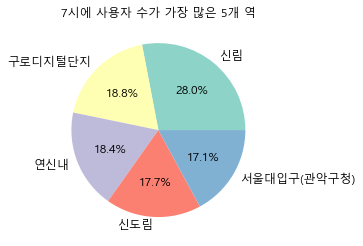

,지하철역,7:00
39,신림,196657
41,구로디지털단지,131660
62,연신내,129343
43,신도림,124463
37,서울대입구(관악구청),119938


In [6]:
# 제일 많은 5개 역 pie chart로 그리기

# 제일 많은 5개 역 자른 데이터 만들기, 내림차순
df700 = df.sort_values(by = '7:00', ascending = False)
df700 = df700[['지하철역', '7:00']].head()

colorss = sns.color_palette('Set3',len(df700['지하철역'])) 
    # 색상 지정, seaborn의 color_palette() 함수를 사용한다.

plt.pie(df700['7:00'], labels=df700['지하철역'], autopct='%.1f%%', textprops={'fontsize': 12}, 
        colors = colorss)
plt.title('7시에 사용자 수가 가장 많은 5개 역')


plt.show()
display(df700[['지하철역','7:00']])

In [7]:
# 먼저 가장 많은 역 수 확인하기

df800 = df.sort_values(by='8:00', ascending=False)
df800 = df800[['지하철역', '8:00']].head()
display(df800)

df900 = df.sort_values(by='9:00', ascending = False)
df900 = df900[['지하철역', '9:00']].head()
display(df900)

,지하철역,8:00
39,신림,300910
37,서울대입구(관악구청),183150
41,구로디지털단지,182485
62,연신내,157229
386,까치산,151498


,지하철역,9:00
39,신림,175454
37,서울대입구(관악구청),115739
41,구로디지털단지,111021
25,잠실(송파구청),107124
62,연신내,83712


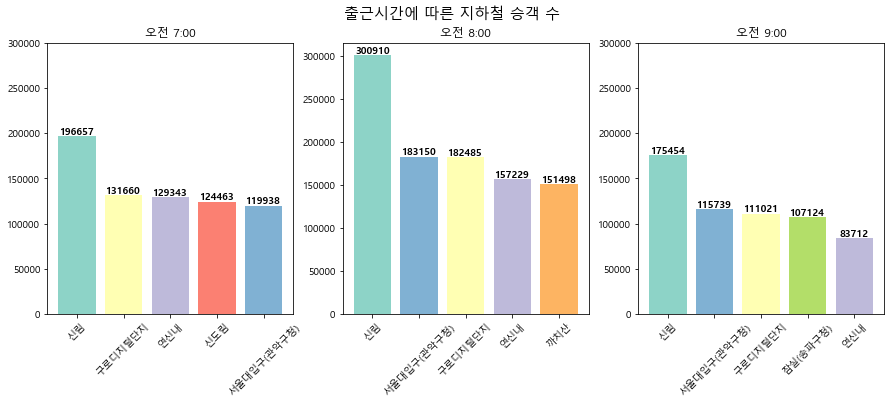

In [8]:
#colorss = sns.color_palette('Set3',len(df25['지하철역'])) ## 색상 지정
colorss = sns.color_palette('Set3',len(df700['지하철역'])) ## 색상 지정
plt.figure(1, figsize = (15,5))
plt.subplot(131)
plt.bar(df700['지하철역'], df700['7:00'].head(), color = colorss)
plt.xticks(rotation = 45)

plt.ylim(0,300000)
plt.title('오전 7:00')
# 그래프에 텍스트 표시하기
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for x,y in enumerate(list(df700['7:00'].head())):
    txt = "%d" % y
    plt.text(x,y, txt, fontsize = 10, color= 'black',
                horizontalalignment = 'center', verticalalignment = 'bottom', fontweight = 'bold')

    
# 2번째 그래프  
plt.subplot(132)
plt.bar(df800['지하철역'], df800['8:00'], color = ['#8DD3C7', '#80B1D3', '#FFFFB3','#BEBADA', '#FDB462'])
plt.xticks(rotation = 45)


plt.title('오전 8:00')
for x,y in enumerate(list(df800['8:00'].head())):
    txt = "%d" % y
    plt.text(x,y, txt, fontsize = 10, color= 'black',
                horizontalalignment = 'center', verticalalignment = 'bottom', fontweight = 'bold')

    
# 3번째 그래프
plt.subplot(133)
plt.bar(df900['지하철역'], df900['9:00'], color = ['#8DD3C7', '#80B1D3', '#FFFFB3','#B3DE69', '#BEBADA'])
plt.xticks(rotation = 45)

plt.ylim(0,300000)
plt.title('오전 9:00')
for x,y in enumerate(list(df900['9:00'].head())):
    txt = "%d" % y
    plt.text(x,y, txt, fontsize = 10, color= 'black',
                horizontalalignment = 'center', verticalalignment = 'bottom', fontweight = 'bold')    
    
plt.suptitle('출근시간에 따른 지하철 승객 수', fontsize = 15)
plt.show()


시간대별 인원 추이

In [9]:
#모든 세로합을 나타내는 새로운 행 만들기

# 오전 4시, 5시, 6시 이름 바꾸기
df.rename(columns = {"4:00:00": "4:00", '5:00:00':'5:00', '6:00:00':'6:00'}, inplace = True)
display(df.head())
    # 4시, 5시, 6시 정보가 잘 바뀌었는지 확인하기

,사용월,호선명,역ID,지하철역,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00,1:00,2:00,3:00
0,2020-11,1호선,1,서울역,753,8675,11072,32647,59127,41390,38848,45649,56164,59894,50166,69417,73931,129234,183615,94572,63184,61979,40086,13602,49,0,0,0
1,2020-11,1호선,10,동묘앞,123,3339,3256,5769,8088,6810,7547,11792,17177,24148,28516,32662,31980,29852,19668,8718,5118,4856,2979,1107,1,0,1,0
2,2020-11,1호선,2,시청,46,1906,2883,5827,7572,8301,9008,13391,15406,19664,24861,33005,38620,69711,129123,48632,38231,37627,21534,6610,22,0,0,0
3,2020-11,1호선,3,종각,122,2851,3442,5353,8357,10185,13298,20795,27078,34326,40433,52948,61859,123235,190651,82999,68519,74284,51200,18973,81,0,3,0
4,2020-11,1호선,4,종로3가,175,3652,3448,4655,7046,9708,17330,26846,36216,44880,48904,56171,62258,71916,94262,54470,39668,44288,32207,11090,51,2,1,1


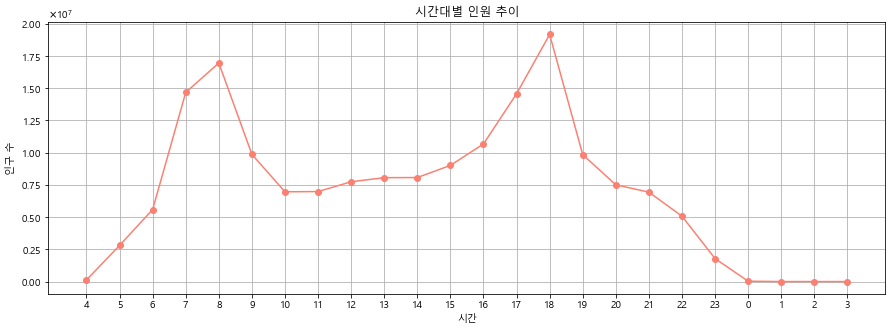

In [10]:
# 사용 월, 호선 명, 역 ID, 지하철역 컬럼 삭제하기
dfsum = df.iloc[:, 4:].sum()

# line plot 그리기
dfsum.plot(kind = 'line', c = '#FB8072', marker = 'o', figsize = (15,5))
plt.grid(True)

# 이렇게 안해주면 x축이 라벨링이 제대로 되지 않아 4:00, 9:00, 14:00, 19:00, 0:00 만 뜬다
plt.xticks(np.arange(0,24,1), labels = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3])

# y축 1e7 표현을 x10^7 표현으로 바꾸는 것
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.xlabel('시간')
plt.ylabel('인구 수')
plt.title('시간대별 인원 추이')
plt.show()

### 코로나와 지하철 승객수
코로나와 지하철 승객 수는 어떤 관계가 있을까? 시각화로 알아보자
    
    코로나 월별 인원수, 지하철 월별 인원수를 얻는다.
    데이터를 정제하여 시각화한다

데이터 로딩과 속성 확인

In [11]:
# 데이터 로딩
sub201911 = pd.read_csv('./data/2019_11.csv',thousands = ',')

# 데이터 확인
display(sub201911.head())

# 데이터프레임 속성 확인
print('데이터 타입들: \n', sub201911.dtypes)
print()
print('행 레이블: \n', sub201911.index)
print()
print('열 레이블: \n', sub201911.columns)
print()
print('데이터값들: \n', sub201911.values)


,사용월,호선명,역ID,지하철역,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00,01:00,02:00,03:00
0,Nov-19,1호선,150,서울역,1019,11590,14391,42971,87305,67678,68167,90965,99178,101652,86494,118199,123372,173386,256149,138349,97617,97623,71535,34270,3959,2,0,0
1,Nov-19,1호선,151,시청,78,2305,3912,8160,10751,13525,17379,24491,28068,35230,45316,57429,70921,91667,170360,74106,60743,61804,40170,14929,917,1,0,0
2,Nov-19,1호선,152,종각,99,4307,4480,7318,12414,15581,20750,32824,41344,56259,66526,81845,94418,146602,248103,121851,105922,124509,100457,45860,3847,0,0,0
3,Nov-19,1호선,153,종로3가,187,5307,4617,6657,11028,15803,26365,39660,53173,66401,76172,85615,95877,101394,122185,84314,64827,72171,61122,26081,3031,6,0,0
4,Nov-19,1호선,154,종로5가,39,2195,3118,5783,9742,13901,23086,34593,45972,58668,68442,72326,77039,95767,124043,67845,45822,39951,31979,10796,827,0,0,0


데이터 타입들: 
 사용월      object
호선명      object
역ID       int64
지하철역     object
 4:00     int64
 5:00     int64
6:00      int64
7:00      int64
8:00      int64
9:00      int64
10:00     int64
11:00     int64
12:00     int64
13:00     int64
14:00     int64
15:00     int64
16:00     int64
17:00     int64
18:00     int64
19:00     int64
20:00     int64
21:00     int64
22:00     int64
23:00     int64
00:00     int64
01:00     int64
02:00     int64
03:00     int64
dtype: object

행 레이블: 
 RangeIndex(start=0, stop=597, step=1)

열 레이블: 
 Index(['사용월', '호선명', '역ID', '지하철역', ' 4:00', ' 5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '00:00',
       '01:00', '02:00', '03:00'],
      dtype='object')

데이터값들: 
 [['Nov-19' '1호선' 150 ... 2 0 0]
 ['Nov-19' '1호선' 151 ... 1 0 0]
 ['Nov-19' '1호선' 152 ... 0 0 0]
 ...
 ['Nov-19' '우이신설선' 4711 ... 0 0 0]
 ['Nov-19' '우이신설선' 4712 ... 2 0

데이터 정제

In [12]:
# dfsum = df.iloc[:, 4:].sum()
# 사용월, 호선명, 역ID, 지하철역 삭제
# sum()함수를 사용하여 모든 지하철 이용 승객을 더한다.
sub201911 = sub201911.iloc[:, 4:].sum()
print('2019년 11월\n',sub201911)

2019년 11월
  4:00      136295
 5:00     3346829
6:00      6443907
7:00     17349388
8:00     21036688
9:00     13466666
10:00    10080039
11:00    10070291
12:00    11122652
13:00    11614311
14:00    11483214
15:00    12772457
16:00    14949102
17:00    18646781
18:00    23895039
19:00    13159417
20:00    10352579
21:00     9872091
22:00     8230051
23:00     3739180
00:00      516886
01:00         600
02:00          19
03:00           0
dtype: int64


In [13]:
# 나머지 값들(2019년 12월 ~ 2020년 11월)도 데이터를 로딩하고 처리를 해 준다.
sub201912 = pd.read_csv('./data/2019_12.csv',thousands = ',')
sub201912 = sub201912.iloc[:, 4:].sum()

sub202001 = pd.read_csv('./data/2020_01.csv',thousands = ',')
sub202001 = sub202001.iloc[:, 4:].sum()

sub202002 = pd.read_csv('./data/2020_02.csv',thousands = ',')
sub202002 = sub202002.iloc[:, 4:].sum()

sub202003 = pd.read_csv('./data/2020_03.csv',thousands = ',')
sub202003 = sub202003.iloc[:, 4:].sum()

sub202004 = pd.read_csv('./data/2020_04.csv',thousands = ',')
sub202004 = sub202004.iloc[:, 4:].sum()

sub202005 = pd.read_csv('./data/2020_05.csv',thousands = ',')
sub202005 = sub202005.iloc[:, 4:].sum()

sub202006 = pd.read_csv('./data/2020_06.csv',thousands = ',')
sub202006 = sub202006.iloc[:, 4:].sum()

sub202007 = pd.read_csv('./data/2020_07.csv',thousands = ',')
sub202007 = sub202007.iloc[:, 4:].sum()

sub202008 = pd.read_csv('./data/2020_08.csv',thousands = ',')
sub202008 = sub202008.iloc[:, 4:].sum()

sub202009 = pd.read_csv('./data/2020_09.csv',thousands = ',')
sub202009 = sub202009.iloc[:, 4:].sum()

sub202010 = pd.read_csv('./data/2020_10.csv',thousands = ',')
sub202010 = sub202010.iloc[:, 4:].sum()

sub202011 = pd.read_csv('./data/2020_11.csv',thousands = ',')
sub202011 = sub202011.iloc[:, 4:].sum()


In [14]:
# 슬라이싱한 값 확인, 처음 오전 4:00 정보부터 3:00 정보까지다.
print(sub201911.values)

[  136295  3346829  6443907 17349388 21036688 13466666 10080039 10070291
 11122652 11614311 11483214 12772457 14949102 18646781 23895039 13159417
 10352579  9872091  8230051  3739180   516886      600       19        0]


In [15]:
#새로운 데이터 프레임을 만들어 index = 시간, columns = 년도-월, value = 인원수 정보를 넣는다.

sub = pd.DataFrame(sub201911.values, index = sub201911.index, columns = ['2019-11'])
sub['2019-12'] = sub201912.values
sub['2020-01'] = sub202001.values
sub['2020-02'] = sub202002.values
sub['2020-03'] = sub202003.values
sub['2020-04'] = sub202004.values
sub['2020-05'] = sub202005.values
sub['2020-06'] = sub202006.values
sub['2020-07'] = sub202007.values
sub['2020-08'] = sub202008.values
sub['2020-09'] = sub202009.values
sub['2020-10'] = sub202010.values
sub['2020-11'] = sub202011.values

sub

,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
4:00,136295,121864,108767,100584,101597,105472,114714,126960,132972,121387,126655,127017,122278
5:00,3346829,3178626,2864577,2657355,2542103,2571381,2735202,2955556,3024999,2624751,2644946,2771054,2804289
6:00,6443907,6139383,5699961,5260208,4930503,5057061,5313295,6005670,6228182,5247668,5208183,5390081,5589380
7:00,17349388,16283518,14993171,14029849,12496293,12618988,13222919,15379254,16072058,13000750,13020384,13878981,14672082
8:00,21036688,19909158,18121668,16601688,14222426,14432553,15257337,17007639,17853565,14604646,14364483,15799408,16956780
9:00,13466666,12985653,11503705,9690059,8233268,8651855,9383341,9814727,10317935,8769055,8342859,9579486,9867478
10:00,10080039,10322453,8964311,6731542,5160820,5848565,6867525,6863412,7335345,6315851,5814896,7096128,6963654
11:00,10070291,10629846,9242802,6708330,4960357,5734256,6884571,6766928,7345837,6408199,5759536,7208783,6982862
12:00,11122652,11530412,10187627,7455676,5452009,6285783,7508286,7277922,7909816,6946748,6231176,7844794,7742323
13:00,11614311,12078782,10725906,7894943,5844659,6713311,7937772,7582227,8252394,7122377,6512963,8186118,8059939


In [16]:
# 모든 시간 정보를 더하여 월 이용자 수를 얻는다.
subsum = sub.sum()
subsum

2019-11    232284482
2019-12    234574904
2020-01    207743593
2020-02    169582542
2020-03    139686779
2020-04    149118804
2020-05    165100450
2020-06    172139520
2020-07    184119860
2020-08    153500916
2020-09    145041726
2020-10    169782172
2020-11    172429012
dtype: int64

코로나 데이터 로드와 속성 확인

In [17]:
covid = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv',encoding= 'cp949')
display(covid)
# 한글이 깨져나와 encoding 옵션을 넣어준다.

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,9159,12.01.,NaN,NaN,NaN,광진구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-02 11:00:13,2020-12-02 11:00:13,Y
1,9158,12.01.,NaN,NaN,NaN,종로구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-02 11:00:13,2020-12-02 11:00:13,Y
2,9157,12.01.,NaN,NaN,NaN,동대문구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-02 11:00:13,2020-12-02 11:00:13,Y
3,9156,12.01.,NaN,NaN,NaN,서초구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-02 11:00:13,2020-12-02 11:00:13,Y
4,9155,12.01.,NaN,NaN,NaN,타시도,NaN,마포구 홈쇼핑회사 관련,NaN,NaN,NaN,2020-12-02 11:00:13,2020-12-02 11:00:13,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,5,1.31.,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-02 10:59:55,2020-12-03 09:00:01,Y
9155,4,1.30.,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-02 10:59:55,2020-12-03 09:00:01,Y
9156,3,1.30.,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-02 10:59:55,2020-12-03 09:00:01,Y
9157,2,1.30.,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-02 10:59:55,2020-12-03 09:00:01,Y


정보를 보면, 환자번호, 국적, 환자정보 등 NaN 정보가 많다. 하지만 우리는 월별 확진자 수만 필요하므로 칼럼을 삭제하거나 하지 않는다.

In [18]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      9159 non-null   int64  
 1   확진일     9159 non-null   object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      9159 non-null   object 
 6   여행력     550 non-null    object 
 7   접촉력     9159 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      6718 non-null   object 
 10  이동경로    7268 non-null   object 
 11  등록일     9159 non-null   object 
 12  수정일     9159 non-null   object 
 13  노출여부    9159 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1001.9+ KB


In [19]:
# 데이터를 가공하기 위해 복사본을 만든다.
covid2 = covid.copy()

# 확진일 데이터 수정, 우리에게는 월 정보만 필요하다.
# 먼저 확진일 데이터를 확인해보자
print(covid2['확진일'])
    # 정보를 보면 string 형태로 되어있고 .(마침표)로 월과 일 정보가 나눠져있다.
    
def month_data(data):
        return data.split(".")[0]

covid2['확진일'] = covid2['확진일'].map(month_data).astype(int)
    # 확진일 정보에서 월 정보를 얻기 위해 month_data에 mapping 시키고, 정수형으로 바꿔준다.
covid2['날짜'] = covid2['확진일']
    # '확진일' 컬럼 이름을 '날짜'컬럼으로 바꿔준다.
print()
print(covid2['확진일'])
print(covid2['확진일'].dtypes)

0       12.01.
1       12.01.
2       12.01.
3       12.01.
4       12.01.
         ...  
9154     1.31.
9155     1.30.
9156     1.30.
9157     1.30.
9158     1.24.
Name: 확진일, Length: 9159, dtype: object

0       12
1       12
2       12
3       12
4       12
        ..
9154     1
9155     1
9156     1
9157     1
9158     1
Name: 확진일, Length: 9159, dtype: int32
int32


In [20]:
grouped = covid2.groupby('날짜')
    # 날짜별로 그룹화 한다.
    
covid_count = grouped.count()
display(covid_count)
    # 그룹별로 카운트한 정보를 봤을 때, '연변' 열이 월별 확진자 수이다.
display(covid_count['연번'])

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
날짜,,,,,,,,,,,,,,
1,7,7,0,0,0,7,3,7,0,7,7,7,7,7
2,80,80,0,0,0,80,11,80,0,80,80,80,80,80
3,391,391,0,0,0,391,132,391,0,391,391,391,391,391
4,156,156,0,0,0,156,113,156,0,156,156,156,156,156
5,228,228,0,0,0,228,24,228,0,228,228,228,228,228
6,460,460,0,0,0,460,24,460,0,460,460,460,460,460
7,281,281,0,0,0,281,39,281,0,281,281,281,281,281
8,2417,2417,0,0,0,2417,51,2417,0,2417,2417,2417,2417,2417
9,1304,1304,0,0,0,1304,23,1304,0,1290,1304,1304,1304,1304


날짜
1        7
2       80
3      391
4      156
5      228
6      460
7      281
8     2417
9     1304
10     733
11    2909
12     193
Name: 연번, dtype: int64

In [21]:
covid_count['확진자수'] = covid_count['연번']
covid_count = covid_count['확진자수']
covid_count
    # '연번'컬럼을 '확진자수'컬럼으로 바꾼다.

날짜
1        7
2       80
3      391
4      156
5      228
6      460
7      281
8     2417
9     1304
10     733
11    2909
12     193
Name: 확진자수, dtype: int64

In [22]:
covid_count.rename(index = {1:'2020-01', 2:'2020-02', 3:'2020-03', 4:'2020-04', 5:'2020-05', 6:'2020-06', 
                            7:'2020-07', 8:'2020-08', 9:'2020-09', 10:'2020-10', 11:'2020-11', 12:'2020-12'},
                   inplace = True)
    # 인덱스를 보기 좋게 수정해준다.

print(covid_count)

날짜
2020-01       7
2020-02      80
2020-03     391
2020-04     156
2020-05     228
2020-06     460
2020-07     281
2020-08    2417
2020-09    1304
2020-10     733
2020-11    2909
2020-12     193
Name: 확진자수, dtype: int64


In [23]:
# 대중교통 자료는 11월 자뵤밖에 없고, 코로나 데이터도 12월 3일 정보만 나와있었으므로, 2020-12 행 삭제
covid_count = covid_count.drop(['2020-12'])
covid_count

날짜
2020-01       7
2020-02      80
2020-03     391
2020-04     156
2020-05     228
2020-06     460
2020-07     281
2020-08    2417
2020-09    1304
2020-10     733
2020-11    2909
Name: 확진자수, dtype: int64

In [24]:
# 코로나 데이터 2019년 11월, 12월 정보 추가
covid_count.loc['2019-12'] = 0
covid_count.loc['2019-11'] = 0
covid_count

날짜
2020-01       7
2020-02      80
2020-03     391
2020-04     156
2020-05     228
2020-06     460
2020-07     281
2020-08    2417
2020-09    1304
2020-10     733
2020-11    2909
2019-12       0
2019-11       0
Name: 확진자수, dtype: int64

In [25]:
# 인덱스 순서 바꿔주기
covid_count = covid_count.reindex(index=['2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
                                         '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
                                         '2020-09', '2020-10', '2020-11'])
covid_count

날짜
2019-11       0
2019-12       0
2020-01       7
2020-02      80
2020-03     391
2020-04     156
2020-05     228
2020-06     460
2020-07     281
2020-08    2417
2020-09    1304
2020-10     733
2020-11    2909
Name: 확진자수, dtype: int64

In [26]:
# 지하철 인원수와 코로나 확진자 정보를 더한 하나의 프레임을 만든다.
covid_transport = pd.DataFrame(covid_count.values, index = covid_count.index, columns=['코로나 확진자'])
covid_transport['지하철 승차 인원'] = subsum.values
covid_transport

,코로나 확진자,지하철 승차 인원
날짜,,
2019-11,0,232284482
2019-12,0,234574904
2020-01,7,207743593
2020-02,80,169582542
2020-03,391,139686779
2020-04,156,149118804
2020-05,228,165100450
2020-06,460,172139520
2020-07,281,184119860


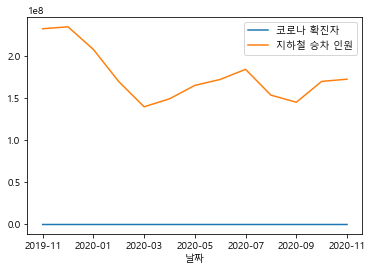

In [27]:
covid_transport.plot(kind = 'line')
plt.show()

In [28]:
# 지하철 승차 인원은 억명인데, 코로나 확진자는 천명 대 이므로 승차 인원 수를 조절해야 한다.
# 승차 인원은 억단위인데, 확진자는 너무 적어서 승차 인원을 10만으로 나누고 10만 표시
covid_transport['지하철 승차 인원(십만)'] = covid_transport['지하철 승차 인원'] / 100000
covid_transport2 = covid_transport[['코로나 확진자', '지하철 승차 인원(십만)']]
    # 승차 인원을 조절한 데이터프레임을 새로 만든다

데이터 시각화

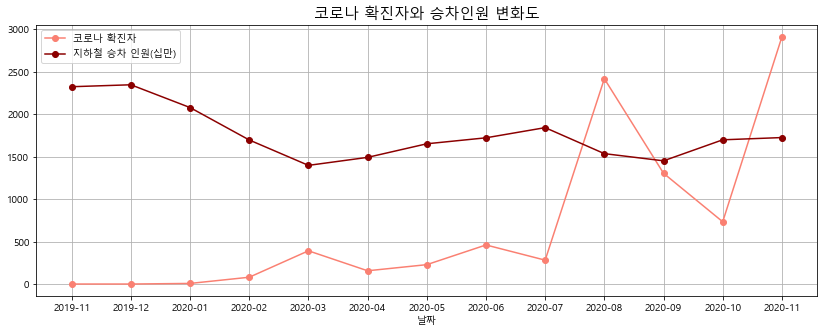

In [29]:
covid_transport2.plot(kind = 'line', figsize = (14,5), marker = 'o', color=['salmon', 'darkred'])
plt.xticks(np.arange(0,13,1), labels=['2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
                                      '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
                                      '2020-09', '2020-10', '2020-11'])

plt.title('코로나 확진자와 승차인원 변화도', fontsize = 15)
plt.grid(True)
plt.show()